<a href="https://colab.research.google.com/github/Sara-Esm/PyTorch/blob/main/05_PyTorch_TorchVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%matplotlib inline

In [18]:
from pathlib import Path # System-independent path handling

import matplotlib.pyplot as plt # Plotting graphs and images
import numpy as np # Numerical operations

import torch # Tensor computations
import torchvision.transforms as T # Image transformations
from torchvision.io import read_image # Load image files into tensors


plt.rcParams["savefig.bbox"] = 'tight' # Minimizes whitespace in saved images
torch.manual_seed(1)


def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

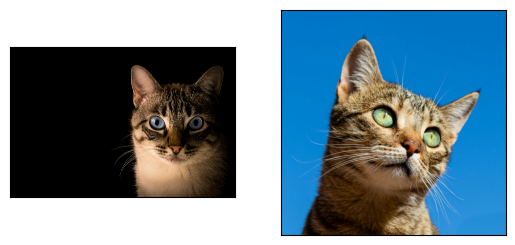

In [19]:
cat1 = read_image(str(Path('images') / '/content/Cat1.jpg'))
cat2 = read_image(str(Path('images') / '/content/Cat2.jpg'))
show([cat1, cat2])

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

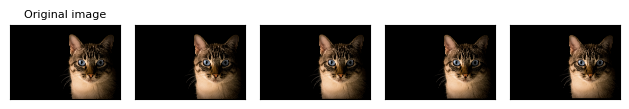

In [22]:
# Most transforms natively support tensors on top of PIL images
# image padding

from PIL import Image
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open(Path('images') / '/content/Cat1.jpg')

padded_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

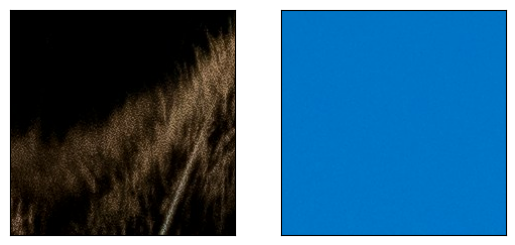

In [23]:
# try some random crop

import torch.nn as nn

transforms = torch.nn.Sequential(
    T.RandomCrop(224),
    T.RandomHorizontalFlip(p=0.3),
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
cat1 = cat1.to(device)
cat2 = cat2.to(device)

transformed_cat1 = transforms(cat1)
transformed_cat2 = transforms(cat2)
show([transformed_cat1, transformed_cat2])

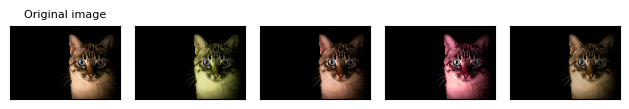

In [24]:
# color jitter
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

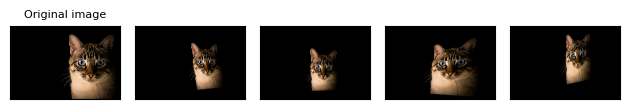

In [25]:
# random perspectives
perspective_transformer = T.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

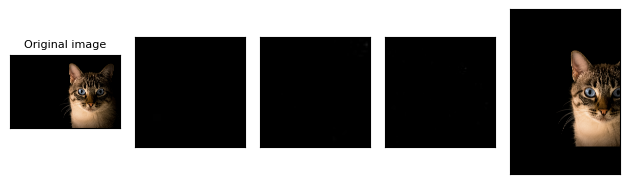

In [26]:
# various center crop
center_crops = [T.CenterCrop(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(center_crops)